## Imports


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
import src.preprocessing

In [2]:
# Removing cached imoports of our own libraries to get latest version
reload(src.preprocessing)

<module 'src.preprocessing' from '/home/nandhu/Documents/kaggle-competitions/src/preprocessing/__init__.py'>

In [3]:
# Importing dataset

train_df = pd.read_csv("./dataset/train.csv")
test_df = pd.read_csv("./dataset/test.csv")

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_description = open("./dataset/data_description.txt", "r")
print(df_description.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Data Inspection 

In [7]:
train_df.describe(include=["O"])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [8]:
# Importing from local libraries

from src.analyse_src import data_inspection

In [9]:
data_inspection.DataTypeInspectionStrategy().inspect(df = train_df)


DataTypes and Non-Null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 

In [10]:
data_inspection.SummaryStatisticsInspectionStrategy().inspect(df= train_df)

Descriptive Statistics of Numerical Datatypes:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202

## Handling Missing Values

In [11]:
# Listing missing values

missing_dict = dict(train_df.isnull().sum())

In [12]:
missing_columns = []
for column in missing_dict:
    if missing_dict[column]>0:
        missing_columns.append(column)
        

In [13]:
missing_columns

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [14]:
# Importing handling missing value strateies

from src.preprocessing.missing_values import DroppingMissingValuesStrategy, FillConstMissingValuesStrategy

### "LotFrontage" Column

LotFrontage: Linear feet of street connected to property


In [15]:
train_df[missing_columns[0]].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

#### Figuring best strategy for missing values

In [16]:
# Filtering df columns related with non-null "LotFrontage" 

temp_df = train_df[train_df[missing_columns[0]].notnull()][["LotFrontage", "LotArea","LotShape"]]

<Axes: xlabel='LotFrontage', ylabel='LotArea'>

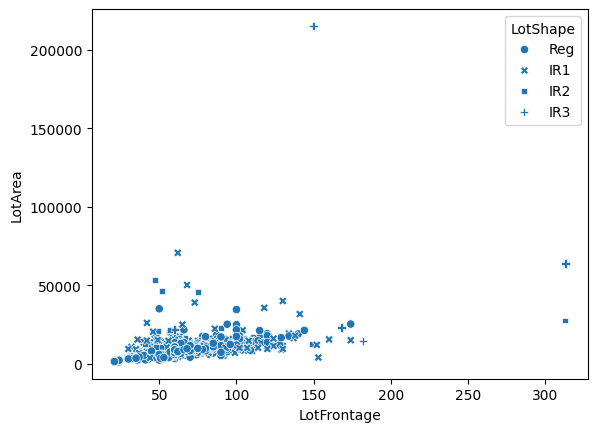

In [18]:
# Scattering plot to analyse the relationship between these columns

sns.scatterplot(data = temp_df, x="LotFrontage", y = "LotArea", markers=True, style="LotShape")

<Axes: xlabel='LotShape', ylabel='LotArea'>

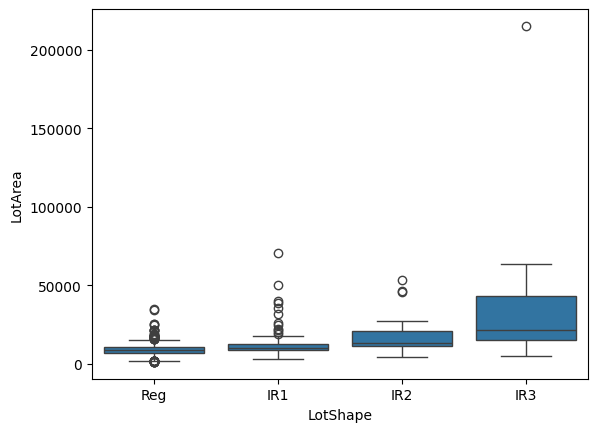

In [19]:
sns.boxplot(data=temp_df, x="LotShape", y="LotArea")

In [20]:
temp_df.groupby(by=["LotShape"]).mean()

,LotFrontage,LotArea
LotShape,,
IR1,76.094637,11353.157729
IR2,76.500000,17943.538462
IR3,138.428571,51478.428571
Reg,67.038778,8843.898942


In [21]:
# Removing outliers

temp_df = temp_df[(temp_df["LotFrontage"]< 200) & (temp_df["LotArea"]< 100000)]

<Axes: xlabel='LotFrontage', ylabel='LotArea'>

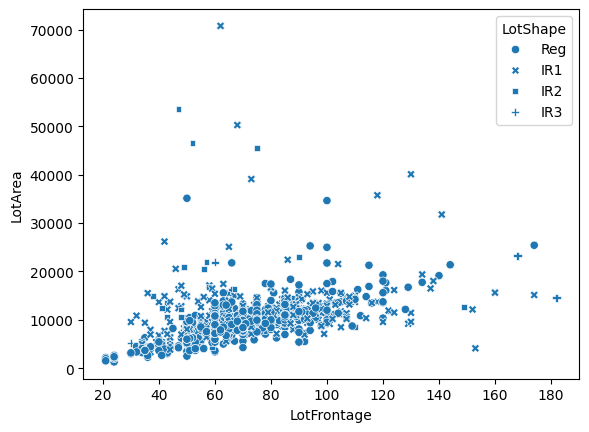

In [22]:
# Scatterplot without outliers

sns.scatterplot(data = temp_df, x="LotFrontage", y = "LotArea", markers=True, style="LotShape")

<Axes: xlabel='LotShape', ylabel='LotArea'>

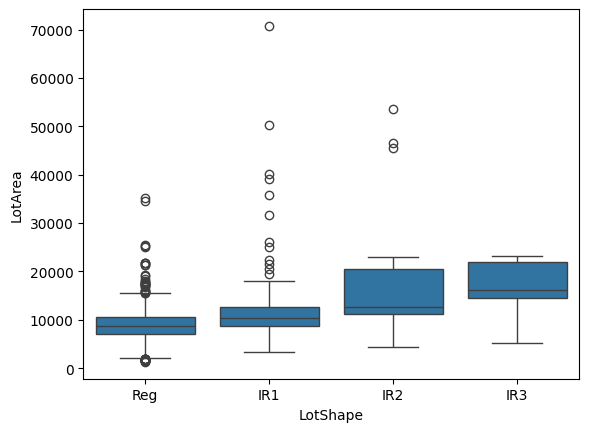

In [23]:
sns.boxplot(data= temp_df, x="LotShape", y = "LotArea")

In [24]:
temp_df.groupby(by=["LotShape"]).mean()

,LotFrontage,LotArea
LotShape,,
IR1,76.094637,11353.157729
IR2,67.040000,17555.280000
IR3,101.200000,16243.400000
Reg,67.038778,8843.898942


In [25]:
# Filtering df columns related with "LotFrontage" (missing)

temp_df = temp_df = train_df[train_df[missing_columns[0]].isnull()][["LotFrontage", "LotArea","LotShape"]]

<Axes: xlabel='LotShape', ylabel='LotArea'>

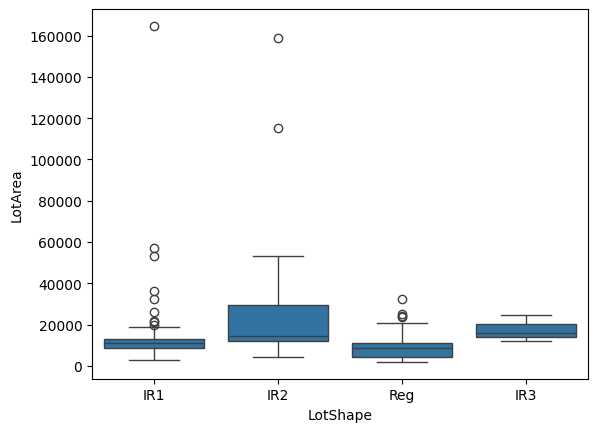

In [26]:
# Comparing categorical and continuous features

sns.boxplot(data=temp_df, x="LotShape", y = "LotArea")

In [27]:
temp_df.groupby(by=["LotShape"]).mean()

,LotFrontage,LotArea
LotShape,,
IR1,NaN,12922.209581
IR2,NaN,33769.866667
IR3,NaN,17677.666667
Reg,NaN,9256.608108


In [28]:
# Removing outliers

temp_df = temp_df[temp_df["LotArea"]< 80000]

<Axes: xlabel='LotShape', ylabel='LotArea'>

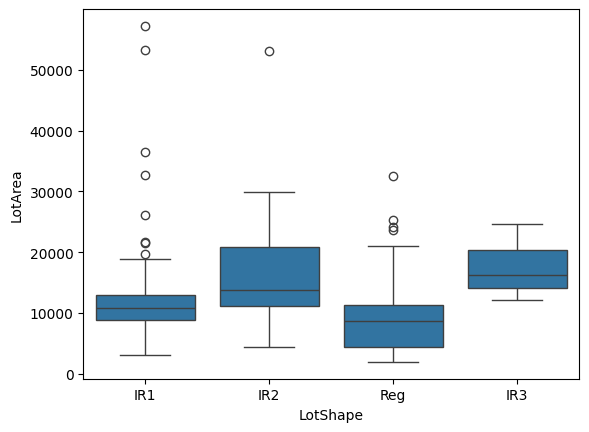

In [29]:
# Comparing categorical and continuous features

sns.boxplot(data=temp_df, x="LotShape", y = "LotArea")

In [30]:
temp_df.groupby(by=["LotShape"]).mean()

,LotFrontage,LotArea
LotShape,,
IR1,NaN,12008.126506
IR2,NaN,17876.846154
IR3,NaN,17677.666667
Reg,NaN,9256.608108


In [31]:
const_missing = FillConstMissingValuesStrategy()

In [32]:
train_df_processing = const_missing.handle(train_df, missing_columns[0], 0)

In [33]:
train_df_processing[missing_columns[0]].describe()

count    1460.000000
mean       57.623288
std        34.664304
min         0.000000
25%        42.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [34]:
missing_columns[1]

'Alley'

### "Alley" Column

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [35]:
train_df["Alley"].isnull().sum()

np.int64(1369)

In [36]:
train_df.groupby(by=["Alley"]).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Alley,,,,,,,,,,,,,,,,,,,,,
Grvl,50,50,50,50,50,50,50,50,50,50,...,50,0,14,4,50,50,50,50,50,50
Pave,41,41,41,41,41,41,41,41,41,41,...,41,0,4,0,41,41,41,41,41,41


so "Not available" value was mistaken as null value

In [37]:
train_df_processing= const_missing.handle(train_df_processing, "Alley", const= "NotAvailable")

In [38]:
train_df_processing["Alley"].isnull().sum()

np.int64(0)

In [39]:
missing_columns[2]

'MasVnrType'

### "MasVnrType" column

	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	        None
       Stone	Stone

In [40]:
train_df["MasVnrType"].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [41]:
train_df.groupby(by=["MasVnrType"]).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MasVnrType,,,,,,,,,,,,,,,,,,,,,
BrkCmn,15,15,15,15,15,15,15,15,15,15,...,15,0,7,2,15,15,15,15,15,15
BrkFace,445,445,445,445,445,445,445,445,445,445,...,445,2,80,11,445,445,445,445,445,445
Stone,128,128,128,128,128,128,128,128,128,128,...,128,1,6,1,128,128,128,128,128,128


In [42]:
train_df_processing = const_missing.handle(train_df_processing, "MasVnrType", const = "NoNe")

In [43]:
train_df_processing["MasVnrType"].unique()

array(['BrkFace', 'NoNe', 'Stone', 'BrkCmn'], dtype=object)

In [44]:
train_df_processing["MasVnrType"].isnull().sum()

np.int64(0)

In [45]:
missing_columns[3]

'MasVnrArea'

### "MasVnrArea" Column

MasVnrArea: Masonry veneer area in square feet

In [46]:
# Counting Missing Values

train_df["MasVnrArea"].isnull().sum()

np.int64(8)

In [47]:
# Filtering features related to "MasVnrArea" 

temp_df = train_df_processing[["MasVnrType", "MasVnrArea"]]

In [48]:
# Filtering rows with missing values of feature "MasVnrArea"

temp_df_missed = temp_df[temp_df["MasVnrArea"].isnull()]
temp_df_missed.groupby(by=["MasVnrType"]).count()

,MasVnrArea
MasVnrType,
NoNe,0


In [49]:
# Filtering rows with unmissed values of feature "MasVnrArea"

temp_df_unmissed = temp_df[temp_df["MasVnrArea"].notnull()]
temp_df_unmissed.groupby(by=["MasVnrType"]).sum()

,MasVnrArea
MasVnrType,
BrkCmn,3715.0
BrkFace,115259.0
NoNe,946.0
Stone,30631.0


In [50]:

temp_df_unmissed[temp_df_unmissed["MasVnrType"]=="NoNe"]["MasVnrArea"].value_counts()

MasVnrArea
0.0      859
1.0        2
288.0      1
344.0      1
312.0      1
Name: count, dtype: int64

Most common value for "NoNe" type is zero

In [51]:
train_df_processing = const_missing.handle(train_df_processing, "MasVnrArea", const =0.0)

In [52]:
train_df_processing["MasVnrArea"].isnull().sum()

np.int64(0)

In [53]:
missing_columns[4]

'BsmtQual'

### "BsmtQual" Column

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [54]:
train_df["BsmtQual"].isnull().sum()

np.int64(37)

In [55]:
train_df_processing.groupby(by=["BsmtQual"]).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
BsmtQual,,,,,,,,,,,,,,,,,,,,,
Ex,121,121,121,121,121,121,121,121,121,121,...,121,2,2,0,121,121,121,121,121,121
Fa,35,35,35,35,35,35,35,35,35,35,...,35,0,8,3,35,35,35,35,35,35
Gd,618,618,618,618,618,618,618,618,618,618,...,618,2,70,17,618,618,618,618,618,618
TA,649,649,649,649,649,649,649,649,649,649,...,649,3,197,31,649,649,649,649,649,649


In [56]:
train_df_processing = const_missing.handle(train_df_processing, "BsmtQual", const = "NB")

In [57]:
train_df_processing["BsmtQual"].isnull().sum()

np.int64(0)

In [58]:
missing_columns[5]

'BsmtCond'

### "BsmtCond" Column

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [59]:
train_df_processing["BsmtCond"].isnull().sum()

np.int64(37)

In [60]:
train_df_processing["BsmtCond"].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [61]:
train_df_processing = const_missing.handle(train_df_processing, "BsmtCond", const = "NB")

In [62]:
train_df_processing["BsmtCond"].isnull().sum()

np.int64(0)

In [63]:
missing_columns[6]

'BsmtExposure'

### "BsmtExposure" Column

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [64]:
train_df_processing["BsmtExposure"].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [65]:
train_df_processing = const_missing.handle(train_df_processing, "BsmtExposure", const="NB")

In [66]:
train_df_processing["BsmtExposure"].isnull().sum()

np.int64(0)

In [67]:
missing_columns[7]

'BsmtFinType1'

### "BsmtFinType1" Column

	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement


In [68]:
train_df_processing["BsmtFinType1"].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [69]:
train_df_processing = const_missing.handle(train_df_processing, "BsmtFinType1", const = "NB")

In [70]:
train_df_processing["BsmtFinType1"].isnull().sum()

np.int64(0)

### "BsmtFinType2" Column

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [71]:
train_df_processing["BsmtFinType2"].value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [72]:
train_df_processing = const_missing.handle(train_df_processing, "BsmtFinType2", const = "NB")

In [73]:
train_df_processing["BsmtFinType2"].isnull().sum()

np.int64(0)

In [74]:
missing_columns[9]

'Electrical'

### "Electrical" Column


Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [75]:
train_df_processing["Electrical"].isnull().sum()

np.int64(1)

In [76]:
train_df_processing["Electrical"].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [77]:
drop_missed = DroppingMissingValuesStrategy()

In [78]:
train_df_processing = drop_missed.handle(df = train_df_processing, column  = "Electrical")

In [80]:
train_df_processing["Electrical"].isnull().sum()

np.int64(0)

In [82]:
missing_columns[10]

'FireplaceQu'

### "FireplaceQu" Column

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace


In [83]:
train_df_processing["FireplaceQu"].isnull().sum()

np.int64(689)

In [85]:
train_df_processing.groupby(by = ["FireplaceQu"]).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
FireplaceQu,,,,,,,,,,,,,,,,,,,,,
Ex,24,24,24,24,24,24,24,24,24,24,...,24,1,2,0,24,24,24,24,24,24
Fa,33,33,33,33,33,33,33,33,33,33,...,33,1,12,0,33,33,33,33,33,33
Gd,380,380,380,380,380,380,380,380,380,380,...,380,2,50,5,380,380,380,380,380,380
Po,20,20,20,20,20,20,20,20,20,20,...,20,1,10,2,20,20,20,20,20,20
TA,313,313,313,313,313,313,313,313,313,313,...,313,2,56,18,313,313,313,313,313,313


In [86]:
train_df_processing =  const_missing.handle(train_df_processing, "FireplaceQu", const = "NF")

/home/nandhu/Documents/kaggle-competitions/src/preprocessing/missing_values.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({column:const}, inplace =True)


In [87]:
train_df_processing["FireplaceQu"].isnull().sum()

np.int64(0)

In [88]:
missing_columns[11]

'GarageType'

### "GarageType" Column

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [89]:
train_df_processing.groupby(by=["GarageType"]).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
GarageType,,,,,,,,,,,,,,,,,,,,,
2Types,6,6,6,6,6,6,6,6,6,6,...,6,0,1,0,6,6,6,6,6,6
Attchd,870,870,870,870,870,870,870,870,870,870,...,870,6,156,30,870,870,870,870,870,870
Basment,19,19,19,19,19,19,19,19,19,19,...,19,0,5,2,19,19,19,19,19,19
BuiltIn,87,87,87,87,87,87,87,87,87,87,...,87,0,6,3,87,87,87,87,87,87
CarPort,9,9,9,9,9,9,9,9,9,9,...,9,0,0,2,9,9,9,9,9,9
Detchd,387,387,387,387,387,387,387,387,387,387,...,387,1,97,14,387,387,387,387,387,387


In [90]:
train_df_processing = const_missing.handle(train_df_processing, "GarageType", const = "NG")

/home/nandhu/Documents/kaggle-competitions/src/preprocessing/missing_values.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({column:const}, inplace =True)


In [91]:
train_df_processing["GarageType"].isnull().sum()

np.int64(0)

In [92]:
missing_columns[12]

'GarageYrBlt'

### "GarageYrBlt" Column

GarageYrBlt: Year garage was built

In [93]:
train_df_processing["GarageYrBlt"].isnull().sum()

np.int64(81)

(array([  6.,  28.,  49.,  52.,  93., 195., 194., 140., 190., 431.]),
 array([1900., 1911., 1922., 1933., 1944., 1955., 1966., 1977., 1988.,
        1999., 2010.]),
 <BarContainer object of 10 artists>)

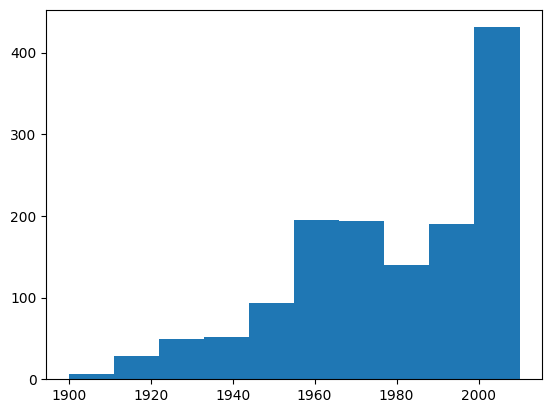

In [94]:
plt.hist(data = train_df_processing , x = "GarageYrBlt")

In [98]:
# Dropping missed values

train_df_processing = drop_missed.handle(train_df_processing, "GarageYrBlt")

In [99]:
train_df_processing["GarageYrBlt"].isnull().sum()

np.int64(0)

In [102]:
missing_columns[13]

'GarageFinish'

### "GarageFinish" Column


GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [103]:
train_df_processing.groupby(by=["GarageFinish"]).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
GarageFinish,,,,,,,,,,,,,,,,,,,,,
Fin,351,351,351,351,351,351,351,351,351,351,...,351,3,31,8,351,351,351,351,351,351
RFn,422,422,422,422,422,422,422,422,422,422,...,422,2,79,19,422,422,422,422,422,422
Unf,605,605,605,605,605,605,605,605,605,605,...,605,2,155,24,605,605,605,605,605,605


In [104]:
train_df_processing = const_missing.handle(train_df_processing, "GarageFinish", const = "NG")

/home/nandhu/Documents/kaggle-competitions/src/preprocessing/missing_values.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({column:const}, inplace =True)


In [105]:
train_df_processing["GarageFinish"].isnull().sum()

np.int64(0)

In [106]:
missing_columns[14]

'GarageQual'


### "GarageQual" Column

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [108]:
train_df_processing.groupby(by=["GarageQual"]).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
GarageQual,,,,,,,,,,,,,,,,,,,,,
Ex,3,3,3,3,3,3,3,3,3,3,...,3,0,1,1,3,3,3,3,3,3
Fa,48,48,48,48,48,48,48,48,48,48,...,48,0,10,4,48,48,48,48,48,48
Gd,14,14,14,14,14,14,14,14,14,14,...,14,1,3,0,14,14,14,14,14,14
Po,3,3,3,3,3,3,3,3,3,3,...,3,0,1,0,3,3,3,3,3,3
TA,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,...,1310,6,250,46,1310,1310,1310,1310,1310,1310


In [109]:
train_df_processing = const_missing.handle(train_df_processing, "GarageQual", const ="NG")

/home/nandhu/Documents/kaggle-competitions/src/preprocessing/missing_values.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({column:const}, inplace =True)


In [110]:
train_df_processing["GarageQual"].isnull().sum()

np.int64(0)

In [112]:
missing_columns[15]

'GarageCond'

### "GarageCond" Column

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [113]:
train_df_processing.groupby(by=["GarageCond"]).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
GarageCond,,,,,,,,,,,,,,,,,,,,,
Ex,2,2,2,2,2,2,2,2,2,2,...,2,0,0,1,2,2,2,2,2,2
Fa,35,35,35,35,35,35,35,35,35,35,...,35,0,6,2,35,35,35,35,35,35
Gd,9,9,9,9,9,9,9,9,9,9,...,9,1,6,0,9,9,9,9,9,9
Po,7,7,7,7,7,7,7,7,7,7,...,7,0,4,0,7,7,7,7,7,7
TA,1325,1325,1325,1325,1325,1325,1325,1325,1325,1325,...,1325,6,249,48,1325,1325,1325,1325,1325,1325


In [114]:
train_df_processing = const_missing.handle(train_df_processing, "GarageCond", const = "NG")

/home/nandhu/Documents/kaggle-competitions/src/preprocessing/missing_values.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({column:const}, inplace =True)


In [115]:
train_df_processing["GarageCond"].isnull().sum()

np.int64(0)

In [117]:
missing_columns[16]

'PoolQC'

### "PoolQC" Column

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [118]:
train_df_processing.groupby(by = ["PoolQC"]).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
PoolQC,,,,,,,,,,,,,,,,,,,,,
Ex,2,2,2,2,2,2,2,2,2,2,...,2,2,2,0,2,2,2,2,2,2
Fa,2,2,2,2,2,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,2
Gd,3,3,3,3,3,3,3,3,3,3,...,3,3,2,0,3,3,3,3,3,3


In [119]:
train_df_processing = const_missing.handle(train_df_processing, "PoolQC", const = "NP")

/home/nandhu/Documents/kaggle-competitions/src/preprocessing/missing_values.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({column:const}, inplace =True)


In [120]:
train_df_processing["PoolQC"].isnull().sum()

np.int64(0)

In [124]:
missing_columns[17]

'Fence'

### "Fence" Column

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [126]:
train_df_processing.groupby(by=["Fence"]).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Fence,,,,,,,,,,,,,,,,,,,,,
GdPrv,58,58,58,58,58,58,58,58,58,58,...,58,58,58,5,58,58,58,58,58,58
GdWo,50,50,50,50,50,50,50,50,50,50,...,50,50,50,3,50,50,50,50,50,50
MnPrv,146,146,146,146,146,146,146,146,146,146,...,146,146,146,14,146,146,146,146,146,146
MnWw,11,11,11,11,11,11,11,11,11,11,...,11,11,11,1,11,11,11,11,11,11


In [127]:
train_df_processing = const_missing.handle(train_df_processing, "Fence", const = "NF")

/home/nandhu/Documents/kaggle-competitions/src/preprocessing/missing_values.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({column:const}, inplace =True)


In [128]:
train_df_processing["Fence"].isnull().sum()

np.int64(0)

In [129]:
missing_columns[18]

'MiscFeature'

### "MiscFeature" Column

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [130]:
train_df_processing.groupby(by=["MiscFeature"]).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MiscFeature,,,,,,,,,,,,,,,,,,,,,
Gar2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Othr,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Shed,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
TenC,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [131]:
train_df_processing = const_missing.handle(train_df_processing, "MiscFeature", const = "NF")

/home/nandhu/Documents/kaggle-competitions/src/preprocessing/missing_values.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({column:const}, inplace =True)


In [132]:
train_df_processing["MiscFeature"].isnull().sum()

np.int64(0)

## Encoding

In [134]:
train_df_processing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [136]:
train_df_processing["MSSubClass"].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

In [137]:
train_df_processing["MSZoning"].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)